In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random #for random index generation for division of test and training sets
from __future__ import division #Division does not turn integers to floating point in Python 2.7, hence importing this

In [111]:
df = pd.read_csv("chitra/train.csv")
print df[[]].isnull() # no missing data as indicated on kaggle link

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[42000 rows x 0 columns]


In [112]:
print(df.info())
print(df.head())
df = df.values #converting to numpy array from data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
None
   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0    

[2]


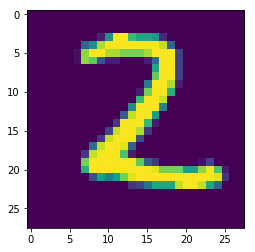

In [113]:
x = df[:,1:785] #input
y = df[:,[0]]   #output label

#Printing example for testing refer to https://matplotlib.org/users/image_tutorial.html
example = x[101,]
plt.imshow(example.reshape((28,28)))
print(y[101])

In [114]:
#Max Normalization 
mean_x = np.mean(x, axis = 0) #taking mean across pixels (single channel here)
x = x - mean_x
x = x/255

In [115]:
#dividing into training and test set
index = random.sample(range(0,42000),42000)
train_x = x[index[0:int(0.8*42000)],]
test_x = x[index[int(0.8*42000):42000],]
train_y = y[index[0:int(0.8*42000)],]
test_y = y[index[int(0.8*42000):42000],]

In [116]:
#converting shape of x to a suitable shape and y to categorical variable for keras operation

from tensorflow.python.keras import utils

train_y = utils.to_categorical(train_y)
test_y = utils.to_categorical(test_y)

train_x = np.reshape(train_x, (33600,28,28,1))
test_x = np.reshape(test_x,(8400,28,28,1))

In [117]:
#building model - conv layer 28x28x16, max pool layer 14x14x16, conv2 layer 14x14x32, max pool2 layer 7x7x32, fc layer of 128 nodes and softmax layer of 10 categories
#image of architecture - https://www.easy-tensorflow.com/tf-tutorials/convolutional-neural-nets-cnns

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D

model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = 5, strides = (1,1), activation = 'relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size = 2, strides = (2,2), padding = 'valid'))
model.add(Conv2D(filters = 32, kernel_size = 5, strides = (1,1), activation = 'relu'))
model.add(MaxPool2D(pool_size = 2, strides = (2,2), padding = 'valid'))
model.add(Flatten())
model.add(Dense(10, activation = 'softmax'))

In [118]:
#Model compilation using adam optimization

model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(train_x, train_y, validation_data = (test_x,test_y), epochs =7)

Train on 33600 samples, validate on 8400 samples
Epoch 1/7
33600/33600 [==============================] - 16s 471us/step - loss: 0.2483 - acc: 0.9290 - val_loss: 0.0919 - val_acc: 0.9708
Epoch 2/7
33600/33600 [==============================] - 18s 521us/step - loss: 0.0735 - acc: 0.9776 - val_loss: 0.0653 - val_acc: 0.9781
Epoch 3/7
33600/33600 [==============================] - 14s 419us/step - loss: 0.0508 - acc: 0.9838 - val_loss: 0.0657 - val_acc: 0.9785
Epoch 4/7
33600/33600 [==============================] - 16s 478us/step - loss: 0.0399 - acc: 0.9874 - val_loss: 0.0496 - val_acc: 0.9835
Epoch 5/7
33600/33600 [==============================] - 13s 398us/step - loss: 0.0305 - acc: 0.9905 - val_loss: 0.0550 - val_acc: 0.9820
Epoch 6/7
33600/33600 [==============================] - 13s 392us/step - loss: 0.0256 - acc: 0.9918 - val_loss: 0.0445 - val_acc: 0.9867
Epoch 7/7
33600/33600 [==============================] - 13s 397us/step - loss: 0.0208 - acc: 0.9936 - val_loss: 0.0440 - v

In [119]:
#model evaluated to get test accuracy once again
model.evaluate(test_x,test_y)

8400/8400 [==============================] - 1s 149us/step


[0.044030064155175797, 0.9866666666666667]

[3.6598776e-11 5.9284821e-10 1.5594809e-05 6.2733811e-06 2.1725366e-08
 6.5322567e-11 7.2501558e-12 9.9980885e-01 1.6920122e-04 1.4804133e-09]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


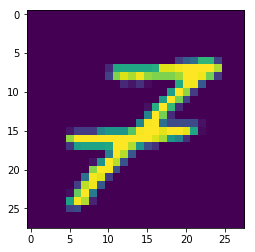

In [120]:
#Example prediction using model

print model.predict(test_x)[0]
print test_y[0,]
example = np.reshape(test_x[0],(1,784))
example = (example * 255 + mean_x) #removing normalization
plt.imshow(np.reshape(example,(28,28)))

In [121]:
df_test = pd.read_csv("chitra/test.csv")
print(np.shape(df_test))
df_test = df_test.values

(28000, 784)


In [122]:
#Mx Normalization
mean_x = np.mean(df_test, axis = 0) #taking mean across pixels (single channel here)
df_test = (df_test - mean_x)
df_test = df_test/255  

#Reshaping data
df_test = np.reshape(df_test, (28000,28,28,1))

In [123]:
df_test_y = model.predict(df_test)

In [124]:
output = np.zeros((28000,2), dtype = 'int')
output[:,0] = range(1,28001)
output[:,1] = np.argmax(df_test_y, axis = 1)
df_output = pd.DataFrame(data = output, columns = ['ImageID', 'Label'])

In [125]:
export_csv = df_output.to_csv(r"chitra/output.csv",index = None, header = True)